In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

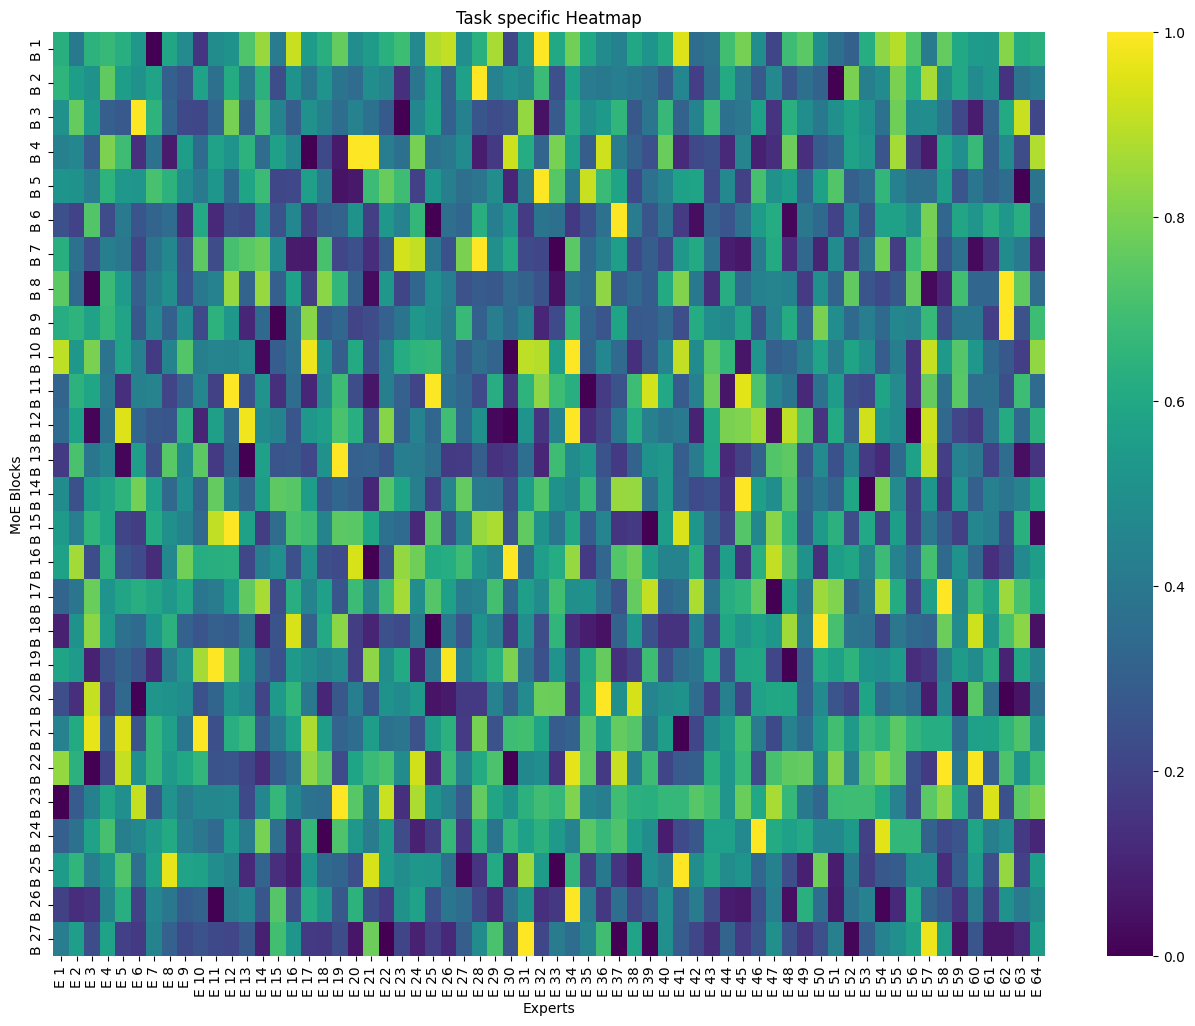

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import torch

save_dir = 'save'
file_path = '/home/LeiFeng/xiaolong/moe_quantize/save/expert_task_specific_score.pt'
expert_routed_distribution = torch.load(file_path, map_location=torch.device('cpu')).numpy()

num_hidden_layers = expert_routed_distribution.shape[0]
n_routed_experts = expert_routed_distribution.shape[1]


normalized_expert_routed_distribution = np.zeros_like(expert_routed_distribution)

for i in range(num_hidden_layers):
    layer_min = expert_routed_distribution[i].min()
    layer_max = expert_routed_distribution[i].max()
    normalized_expert_routed_distribution[i] = (expert_routed_distribution[i] - layer_min) / (layer_max - layer_min)

expert_routed_distribution = normalized_expert_routed_distribution

# Heatmap for the overall distribution
plt.figure(figsize=(16, 12))
sns.heatmap(expert_routed_distribution, annot=False, cmap="viridis",
            xticklabels=[f"E {i+1}" for i in range(n_routed_experts)],
            yticklabels=[f"B {i+1}" for i in range(num_hidden_layers)])


plt.title("Task specific Heatmap")
plt.xlabel("Experts")
plt.ylabel("MoE Blocks")
plt.savefig(os.path.join(save_dir, "task_specific_heatmap.png"))
plt.show()

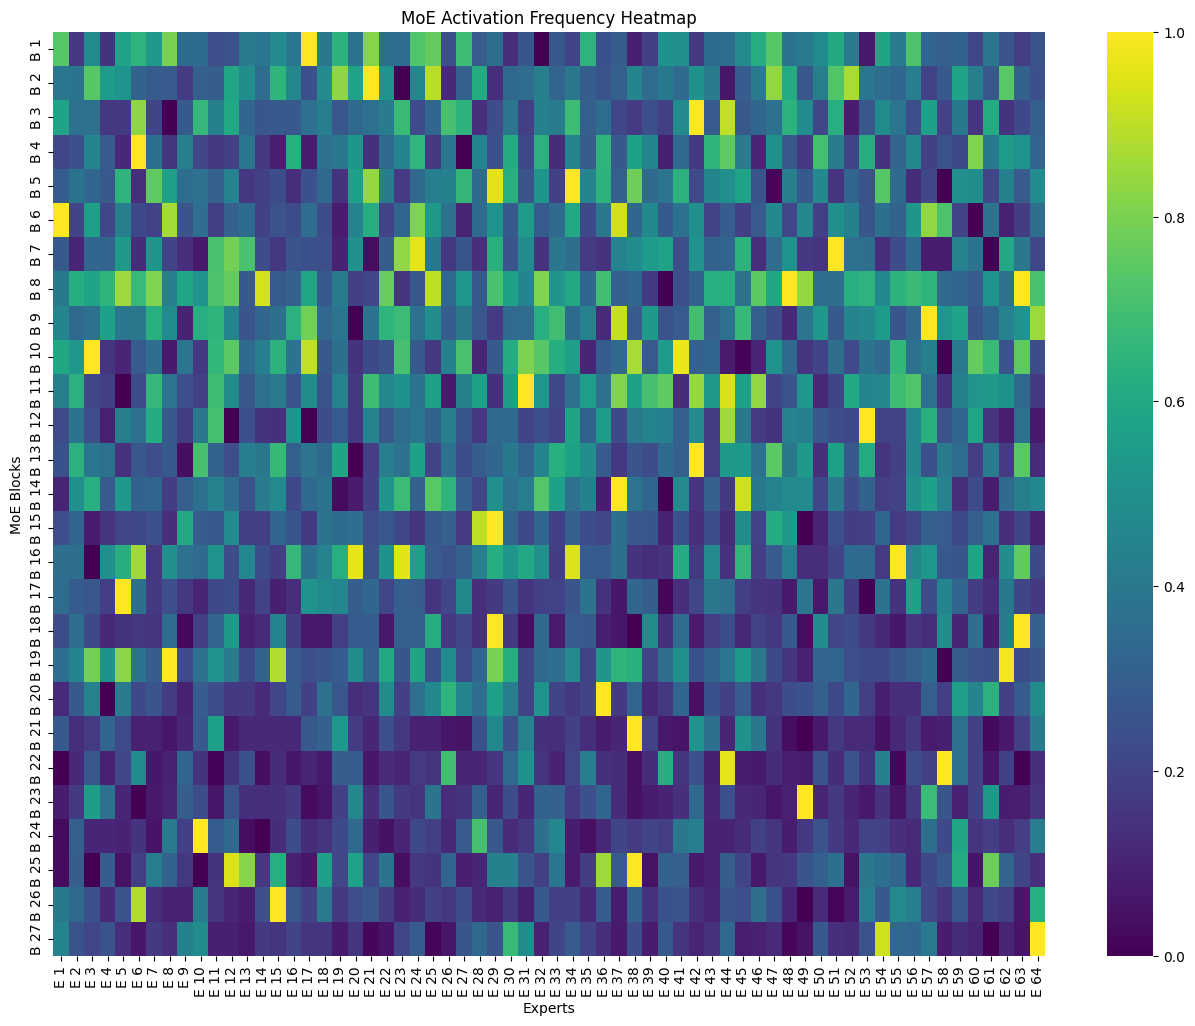

In [5]:
save_dir = 'save'

file_path = '/home/LeiFeng/xiaolong/moe_quantize/save/routing-count.pt'
expert_routed_distribution = torch.load(file_path, map_location=torch.device('cpu')).numpy()

num_hidden_layers = expert_routed_distribution.shape[0]
n_routed_experts = expert_routed_distribution.shape[1]

normalized_expert_routed_distribution = np.zeros_like(expert_routed_distribution)

for i in range(num_hidden_layers):
    layer_min = expert_routed_distribution[i].min()
    layer_max = expert_routed_distribution[i].max()
    normalized_expert_routed_distribution[i] = (expert_routed_distribution[i] - layer_min) / (layer_max - layer_min)

expert_routed_distribution = normalized_expert_routed_distribution

# Heatmap for the overall distribution
plt.figure(figsize=(16, 12))
sns.heatmap(expert_routed_distribution, annot=False, cmap="viridis",
            xticklabels=[f"E {i+1}" for i in range(n_routed_experts)],
            yticklabels=[f"B {i+1}" for i in range(num_hidden_layers)])


plt.title("MoE Activation Frequency Heatmap")
plt.xlabel("Experts")
plt.ylabel("MoE Blocks")
plt.savefig(os.path.join(save_dir, "moe_activation_frequency_heatmap.png"))
